# Math and Numpy Fundamentals for Deep Learning :

### Vectors :     

In [1]:
import numpy as np

# 1D vector
vector = np.array([1, 1])


# 2D vector
matrix_2d = np.array([[1, 1],
                   [1, 1]])

# 3D vector
matrix_3d = np.array([[[1, 2],
                       [3, 4]],
                      [[5, 6],
                       [7, 8]],
                      [[9, 10],
                       [11, 12]]])

In [2]:
vector, vector.ndim

(array([1, 1]), 1)

In [3]:
matrix_2d, matrix_2d.ndim

(array([[1, 1],
        [1, 1]]),
 2)

In [4]:
matrix_3d, matrix_3d.ndim

(array([[[ 1,  2],
         [ 3,  4]],
 
        [[ 5,  6],
         [ 7,  8]],
 
        [[ 9, 10],
         [11, 12]]]),
 3)

In [5]:
matrix_3d[2][1]

array([11, 12])

**Plotting a 1D vector :**

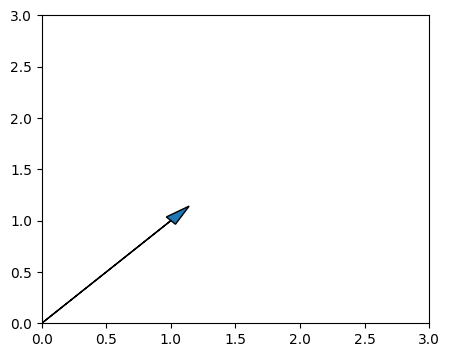

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize = (5, 4))

plt.xlim(0, 3)
plt.ylim(0, 3)

plt.arrow(0, 0, vector[0], vector[1], head_width = 0.1, head_length = 0.2)
plt.show();

Length of the vector can be found using:
- Euclidean Distance
- L2 Norm

Both are same by the way here is the formula to calculate L2 Norm:
- $$||x||_2 = \sqrt{x^2_1 + x^2_2 + \cdots + x^2_n} $$

In [7]:
# calculate the length of the above vector
vector_length = np.sqrt(np.sum(vector ** 2))
vector_length

np.float64(1.4142135623730951)

**Plotting a 3D vector :**

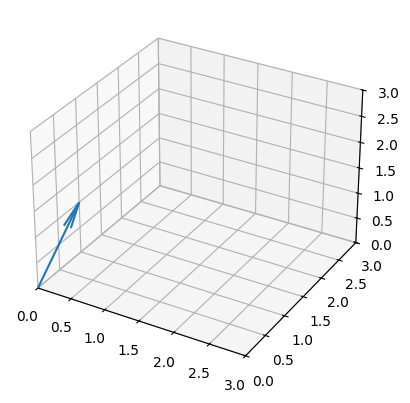

In [8]:
v = np.array([0, 1, 1])

# plots 3d vector
fig = plt.figure()

ax = fig.add_subplot(111, projection = "3d")

ax.set_xlim([0, 3])
ax.set_ylim([0, 3])
ax.set_zlim([0, 3])

ax.quiver(0, 0, 0, v[0], v[1], v[2], length = 1)
fig.show();

In [9]:
# element wise vector addition
v1 = np.array([1, 1])
v2 = np.array([0, 1])

v3 = v1 + v2
v3

array([1, 2])

### Basis Vector:

plotting the basis vectors [0, 1] and [1 ,0]

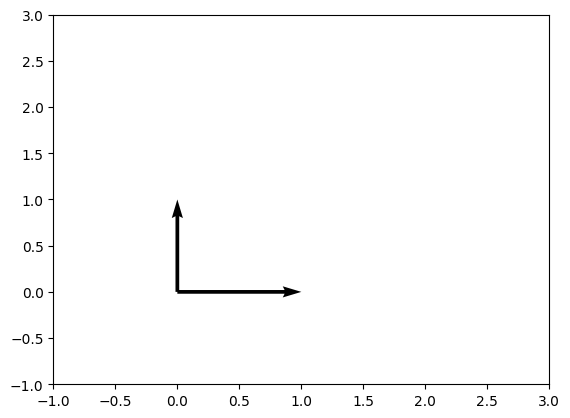

In [10]:
v1 = np.array([1, 0])
v2 = np.array([0, 1])

plt.xlim(-1, 3)
plt.ylim(-1, 3)

plt.quiver([0, 0], [0, 0], [v1[0], v1[1]], [v2[0], v2[1]], angles="xy",
           scale_units="xy", scale=1)
plt.show();

In [11]:
# reaching .3, 1
.3 * v1 + v2

array([0.3, 1. ])

In [12]:
# reaching 5, 3
5 * v1 + 3 * v2

array([5, 3])

It means how many basis vector do we need to reach a certain point.

**Note :** Basis vectors are orthogonal to each other:
means they have a 90 degree angle between them

In [13]:
np.dot(v1, v2)

np.int64(0)

## **Matrix Operations :**

In [14]:
M = np.array([[0, 1, 2], [1, 0, 2], [2, 1, 0]])
M

array([[0, 1, 2],
       [1, 0, 2],
       [2, 1, 0]])

In [15]:
M.shape

(3, 3)

In [16]:
M[0][0] = 10
M

array([[10,  1,  2],
       [ 1,  0,  2],
       [ 2,  1,  0]])

### **Linear Regression :**

$$\hat{y} = wx + b$$

- w = slope of the line
- b = intercept of the line

In [17]:
import pandas as pd

# read in data
data = pd.read_csv("/content/drive/MyDrive/NLP_from_scratch/data/clean_weather.csv")
# fill in any missing values in the data with the past values
data.ffill()
data.drop("Unnamed: 0", inplace = True, axis = 1)
targets = data["tmax_tomorrow"]

data.head()

,tmax,tmin,rain,tmax_tomorrow
0,60.0,35.0,0.0,52.0
1,52.0,39.0,0.0,52.0
2,52.0,35.0,0.0,53.0
3,53.0,36.0,0.0,52.0
4,52.0,35.0,0.0,50.0


$$\hat{y} = w_1x_1 + w_2x_2 + w_3x_3 + b$$

- $x_1$ = tmax
- $x_2$ = tmin
- $x_3$ = rain

In [18]:
data.drop(["tmax_tomorrow"], inplace = True, axis = 1)

In [19]:
 # first row prediction basis

w1 = .7
w2 = .3
w3 = .1
b = 10

predicted_row_1 = w1 * 60 + w2 * 35 + w3 * 0 + 10
predicted_row_1

62.5

Now we just want to find the **weights** and **biases** to get an accurate
prediction using Linear Regression.

What we are doing is essentially matrix multiplication.

In [20]:
w = np.array([.7, .3, .1])
x = np.array([60, 35, 0])
b = 10

np.dot(w, x) + b

np.float64(62.5)

In [21]:
# first 3 row of data

X = data.iloc[:3].to_numpy()
X

array([[60., 35.,  0.],
       [52., 39.,  0.],
       [52., 35.,  0.]])

In [22]:
X.shape

(3, 3)

In [23]:
w.shape

(3,)

In [24]:
W = w.reshape(3, 1)
W.shape, X.shape

((3, 1), (3, 3))

In [25]:
b = np.array([10])

# multiply matrix X to W
X @ W + b

array([[62.5],
       [58.1],
       [56.9]])

In [26]:
targets[:3].to_numpy().reshape(3, 1)

array([[52.],
       [52.],
       [53.]])

**finding W using vector projection technique :**
$$W = (X^{T}X)^{-1}X^{T}Y$$

- above equation is called **Normal Equation**.
- provides a closed form solution without using iterative optimizations.
- unstable if matrix is singular or close to being singular.
- takes way high storage to store nxn matrix doesen't scale well with increase in data.

In [27]:
# test the normal equation
(W.T @ X.T + b).T

array([[62.5],
       [58.1],
       [56.9]])

In [28]:
np.allclose((W.T @ X.T).T, X @ W)

True

### **Matrix Inversion :**

$I = (X^{T}X)^{-1}$

In [29]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

 Identity matrix is always a square matrix.

In [30]:
# inverse a matrix
try:
  np.linalg.inv(X)
except np.linalg.LinAlgError:
  print("matrix is singluar so cannot be inversed.")


matrix is singluar so cannot be inversed.


In [31]:
def inverse_matrix(matrix):
  if np.linalg.det(matrix):
    np.linalg.inv(matrix)
  else:
    print("matrix is singular so cannot be inversed.")

In [32]:
inverse_matrix(X)

matrix is singular so cannot be inversed.


The above problem can be tackled if we use:

- **smoothing while inverse :**
  - smoothing means to add a small value to every element so the determinant
  doesen't become 0.

In [33]:
# inverse using smoothing
np.linalg.inv(X + .1 * np.eye(3))

array([[ 0.07378611, -0.06604895,  0.        ],
       [-0.09812987,  0.11341549,  0.        ],
       [-4.02332472, -5.34996509, 10.        ]])

In [34]:
# we inverted this matrix
X + .1 * np.eye(3)

array([[60.1, 35. ,  0. ],
       [52. , 39.1,  0. ],
       [52. , 35. ,  0.1]])

In [35]:
# this was the original matrix
X

array([[60., 35.,  0.],
       [52., 39.,  0.],
       [52., 35.,  0.]])

In [36]:
# check the property inverse * matrix = identity(1)
ridge = X + .1 * np.eye(3)
inverse = np.linalg.inv(ridge)

identity = (ridge @ inverse)
identity

array([[ 1.00000000e+00,  5.41233725e-16,  0.00000000e+00],
       [ 1.06185910e-16,  1.00000000e+00,  0.00000000e+00],
       [-1.12317084e-17,  5.25413240e-16,  1.00000000e+00]])

In [37]:
# you can see we get the identity matrix by rounding
identity.round(1)

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [-0.,  0.,  1.]])

In [38]:
# alternate approach to check the property
np.allclose(identity, np.eye(3))

True

In [39]:
# calculate the W using normal equation

Y = targets.iloc[:3].to_numpy().reshape(3, 1)
W = np.linalg.inv(X.T @ X + .1 * np.eye(3)) @ X.T @ Y

W

array([[0.38283829],
       [0.86270249],
       [0.        ]])

In [40]:
# predicted values
X @ W

array([[53.16488447],
       [53.55298814],
       [50.10217817]])

In [41]:
# actual values
Y

array([[52.],
       [52.],
       [53.]])

We actually overfitted on our small dataset and we didn't calculated b which is important too.

### **Broadcasting :**

Only possible if:
* The smaller array has all of it's dimensions exactly matching the length dimensions of the larger array.
* Or the smaller array is length 1 in the non-matching dimensions.

In [42]:
# example
b = np.array([10])

X @ W

array([[53.16488447],
       [53.55298814],
       [50.10217817]])

In [43]:
# after broadcasting
X @ W + b

array([[63.16488447],
       [63.55298814],
       [60.10217817]])

numpy automatically broadcasted the 1D vector to 2D Matrix
```
[10] -> [[10],[10],[10]]
```

In [44]:
# broadcasting examples

A = np.ones((5, 1))
A + np.ones((1, 1))

array([[2.],
       [2.],
       [2.],
       [2.],
       [2.]])

In [45]:
A + np.ones(1)

array([[2.],
       [2.],
       [2.],
       [2.],
       [2.]])

In [46]:
try :
  A + np.ones((2, 1))
except Exception as e:
  print(e)

operands could not be broadcast together with shapes (5,1) (2,1) 


**⚠️ Note:** You can either have the same shapes or 1 in the row position.

In [47]:
try :
  A + np.ones((1, 2))
  print(True)
except Exception as e:
  print(e)

True


In [48]:
# broadcasting can also be used to multiply the matrix
A * np.full((1, 1), 2)

array([[2.],
       [2.],
       [2.],
       [2.],
       [2.]])

In [49]:
A * np.random.randn(5, 1)

array([[-0.49929855],
       [ 0.01003562],
       [ 1.24194583],
       [-0.45827811],
       [-1.18862163]])

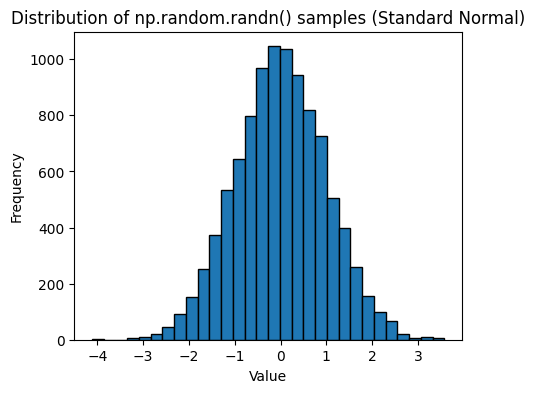

In [50]:
# Generate 10000 random numbers from a standard normal distribution
normal_samples = np.random.randn(10000)

plt.figure(figsize = (5, 4))
plt.hist(normal_samples, bins=30, edgecolor='black')
plt.title('Distribution of np.random.randn() samples (Standard Normal)')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

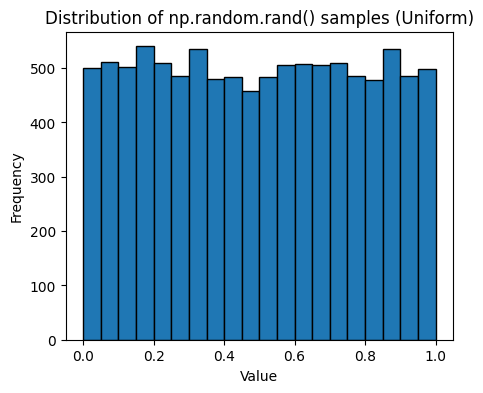

In [51]:
# Generate 10000 random numbers from a uniform distribution
uniform_samples = np.random.rand(10000)

plt.figure(figsize=(5, 4))
plt.hist(uniform_samples, bins=20, edgecolor='black')
plt.title('Distribution of np.random.rand() samples (Uniform)')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

## **Derivatives :**

The derivative will tell us :     
* The slope of the curve at any given point x.
* The instantaneous rate at which y is increasing or decreasing with respect to x at that point.
* An excellent approximation for the amount y will change (Δy) if x changes by a very small amount (Δx), given by Δy≈2x⋅Δx.

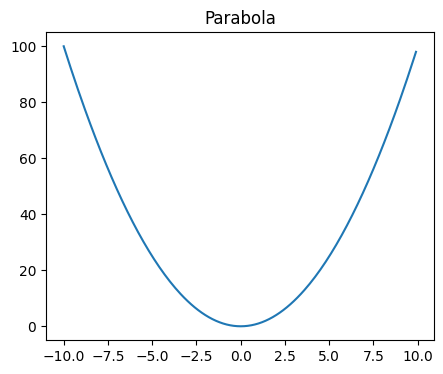

In [52]:
import matplotlib.pyplot as plt

xs = np.arange(-10, 10, .1)
ys = np.square(xs)
plt.figure(figsize = (5, 4))
plt.plot(xs, ys)
plt.title("Parabola")
plt.show();

The diffrence between the y values increases as the value of x increases.

In [53]:
# two values close to 5
x1 = 5 - 1e-8
x2 = 5 + 1e-8

# calculate the corresponding y values
y1 = x1 ** 2
y2 = x2 ** 2

# calculate the slope between those points
slope = (y2-y1) / (x2-x1)
slope

10.0

$f'(5) = 10$

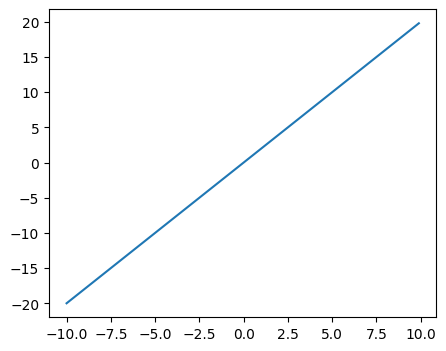

In [54]:
ys = xs * 2

plt.figure(figsize=(5, 4))
plt.plot(xs, ys)
plt.show();